# Load packages and the data

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from torchvision import transforms
import zipfile
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image #for seeing the image of obs i
import torch
import torch.utils.data as data
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input

import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics import precision_score
from tensorflow.keras.models import load_model

In [10]:
# Load preprocessed data
train_image = np.load("train_images.npy")
test_image = np.load("test_images.npy")
val_image = np.load("val_images.npy")
#train_timeframes = np.load("train_timeframes.npy")
#test_timeframes = np.load("test_timeframes.npy")
#val_timeframes = np.load("val_timeframes.npy")

train_schools = np.load("train_schools.npy")
test_schools = np.load("test_schools.npy")
val_schools = np.load("val_schools.npy")

#train_types = np.load("train_types.npy")
#test_types = np.load("test_types.npy")
#val_types = np.load("val_types.npy")

# School

## Ungrouped

In [30]:
school_encoder = {
    'American':0, 'Austrian':1, 'Belgian':2, 'Bohemian':3, 'Danish':4, 'Dutch':5,
    'English':6, 'Flemish':7, 'French':8, 'German':9,  'Hungarian':10,
    'Irish':11, 'Italian':12, 'Netherlandish':13, 'Other':14, 'Polish':15,
    'Portuguese':16, 'Russian':17, 'Scottish':18, 'Spanish':19, 'Swedish':20, 'Swiss':21, 'Catalan':22,
    'Finnish':23, 'Norwegian':24, 'Greek':25
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(26, activation='softmax')(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
history = head_model.fit(train_image, train_schools_new, batch_size=64, epochs=10, validation_data=(test_image, test_schools_new))

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.3423 - loss: 2.3742 - val_accuracy: 0.4331 - val_loss: 1.7990
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.4277 - loss: 1.8628 - val_accuracy: 0.4668 - val_loss: 1.7452
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.4560 - loss: 1.7707 - val_accuracy: 0.4649 - val_loss: 1.7177
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 552s 2s/step - accuracy: 0.4598 - loss: 1.7340 - val_accuracy: 0.4612 - val_loss: 1.7052
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1514s 5s/step - accuracy: 0.4643 - loss: 1.7187 - val_accuracy: 0.4715 - val_loss: 1.6760
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.4743 - loss: 1.6753 - val_accuracy: 0.4696 - val_loss: 1.6572
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.4832 - loss: 1.6389 - val_accuracy: 0.4724 - val_loss: 1.6468
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.4851 - loss: 1.6377 - val_acc

In [28]:
head_model.save('school_ungrouped_model.keras')
#head_model = load_model('school_ungrouped_model.keras')

### Statistics

In [57]:
head_model = load_model('school_ungrouped_model.keras')
school_encoder = {
    'American':0, 'Austrian':1, 'Belgian':2, 'Bohemian':3, 'Danish':4, 'Dutch':5,
    'English':6, 'Flemish':7, 'French':8, 'German':9,  'Hungarian':10,
    'Irish':11, 'Italian':12, 'Netherlandish':13, 'Other':14, 'Polish':15,
    'Portuguese':16, 'Russian':17, 'Scottish':18, 'Spanish':19, 'Swedish':20, 'Swiss':21, 'Catalan':22,
    'Finnish':23, 'Norwegian':24, 'Greek':25
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

In [59]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_schools_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 653ms/step - accuracy: 0.5009 - loss: 1.5974
Validation Loss: 1.57777738571167
Validation Accuracy: 49.67%


34/34 ━━━━━━━━━━━━━━━━━━━━ 31s 808ms/step
Class 0 Accuracy: 0.00%
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 0.00%
Class 3 Accuracy: 0.00%
Class 4 Accuracy: 0.00%
Class 5 Accuracy: 69.62%
Class 6 Accuracy: 0.00%
Class 7 Accuracy: 6.30%
Class 8 Accuracy: 3.23%
Class 9 Accuracy: 0.00%
Class 10 Accuracy: 0.00%
Class 11 Accuracy: 0.00%
Class 12 Accuracy: 94.87%
Class 13 Accuracy: 0.00%
Class 14 Accuracy: 0.00%
Class 16 Accuracy: 0.00%
Class 17 Accuracy: 0.00%
Class 18 Accuracy: 0.00%
Class 19 Accuracy: 2.17%
Class 21 Accuracy: 0.00%
Class 22 Accuracy: 0.00%
Class 24 Accuracy: 0.00%
Class Distribution in Validation Set:
0      10
1      10
2       1
3       1
4       6
5     158
6      21
7     127
8     155
9      59
10     11
11      1
12    429
13     17
14      2
16      1
17      6
18      2
19     46
21      4
22      1
24      1
Name: count, dtype: int64


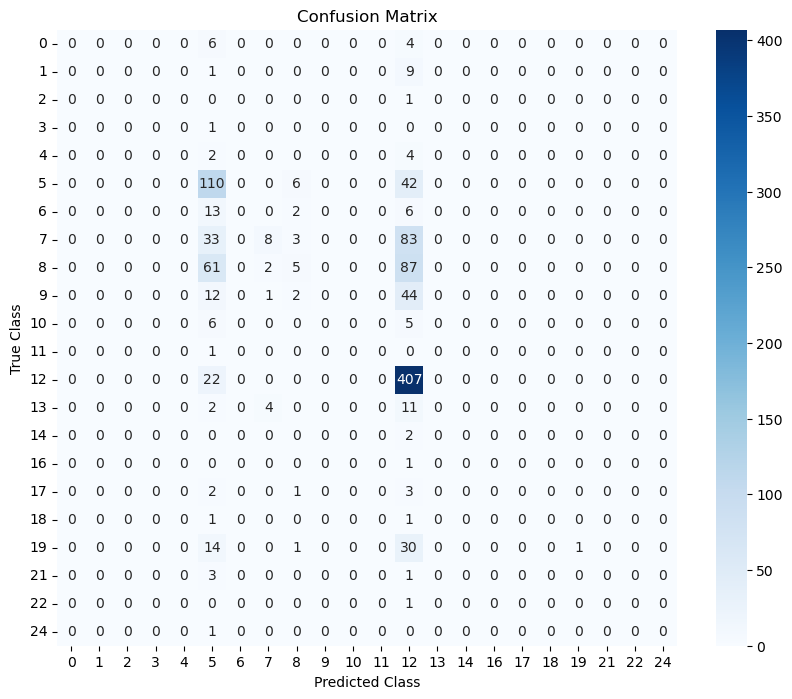

In [61]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_schools_new):
    class_indices = np.where(val_schools_new == class_label)[0]
    true_labels = val_schools_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")
    
np.unique(val_schools_new)

class_counts = pd.Series(val_schools_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_schools_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks()
plt.yticks(rotation=360)
plt.show()

## Grouped

In [4]:
school_encoder = {
    'American':0, 'Austrian':4, 'Belgian':4, 'Bohemian':3, 'Danish':1, 'Dutch':4,
    'English':4, 'Flemish':4, 'French':4, 'German':4,  'Hungarian':3,
    'Irish':4, 'Italian':2, 'Netherlandish':4, 'Other':5, 'Polish':3,
    'Portuguese':2, 'Russian':3, 'Scottish':4, 'Spanish':2, 'Swedish':1, 'Swiss':4, 'Catalan':2,
    'Finnish':1, 'Norwegian':1, 'Greek':2
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation='softmax')(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [5]:
history = head_model.fit(train_image, train_schools_new, batch_size=64, epochs=10, validation_data=(test_image, test_schools_new))

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.5532 - loss: 1.0801 - val_accuracy: 0.6857 - val_loss: 0.7236
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.6621 - loss: 0.7791 - val_accuracy: 0.7063 - val_loss: 0.6933
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.6864 - loss: 0.7280 - val_accuracy: 0.7035 - val_loss: 0.6933
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - accuracy: 0.6916 - loss: 0.7037 - val_accuracy: 0.7212 - val_loss: 0.6646
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.7081 - loss: 0.6861 - val_accuracy: 0.7119 - val_loss: 0.6609
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.7155 - loss: 0.6666 - val_accuracy: 0.7203 - val_loss: 0.6538
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.7248 - loss: 0.6541 - val_accuracy: 0.7222 - val_loss: 0.6463
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.7242 - loss: 0.6632 - val_accu

In [9]:
head_model.save('school_grouped_model.keras')
#head_model = load_model('school_grouped_model.keras')

### Statistics

In [17]:
head_model = load_model('school_grouped_model.keras')
school_encoder = {
    'American':0, 'Austrian':4, 'Belgian':4, 'Bohemian':3, 'Danish':1, 'Dutch':4,
    'English':4, 'Flemish':4, 'French':4, 'German':4,  'Hungarian':3,
    'Irish':4, 'Italian':2, 'Netherlandish':4, 'Other':5, 'Polish':3,
    'Portuguese':2, 'Russian':3, 'Scottish':4, 'Spanish':2, 'Swedish':1, 'Swiss':4, 'Catalan':2,
    'Finnish':1, 'Norwegian':1, 'Greek':2
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

In [19]:
val_loss, val_accuracy = head_model.evaluate(val_image, val_schools_new)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 769ms/step - accuracy: 0.7595 - loss: 0.6680
Validation Loss: 0.6736687421798706
Validation Accuracy: 74.93%


34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 915ms/step
Class 0 Accuracy: 0.00%
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 79.04%
Class 3 Accuracy: 0.00%
Class 4 Accuracy: 76.40%
Class 5 Accuracy: 0.00%
Class Distribution in Validation Set:
0     10
1      7
2    477
3     18
4    555
5      2
Name: count, dtype: int64


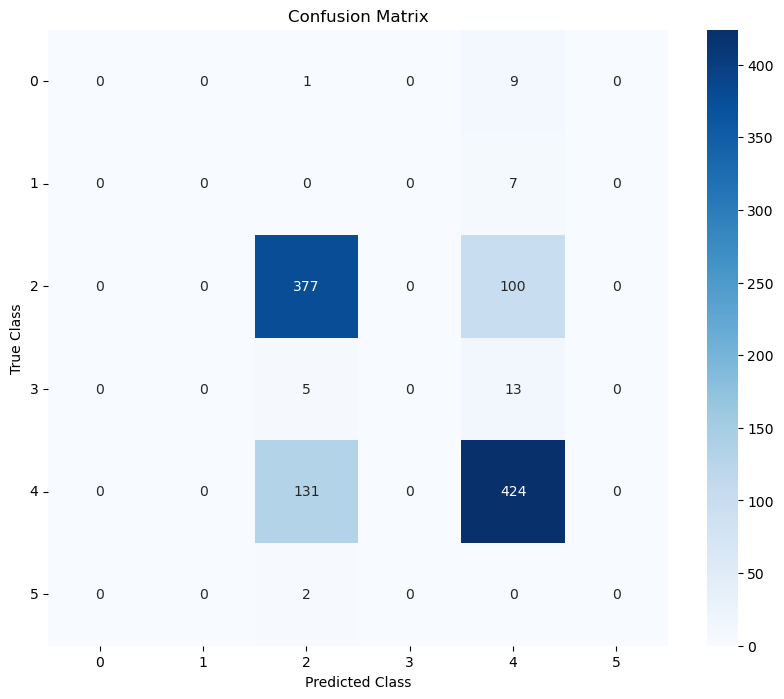

In [20]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_schools_new):
    class_indices = np.where(val_schools_new == class_label)[0]
    true_labels = val_schools_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")
    
np.unique(val_schools_new)

class_counts = pd.Series(val_schools_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_schools_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks()
plt.yticks(rotation=360)
plt.show()

# Type

In [3]:
type_encoder = {
    'genre':0, 'historical':1, 'interior':2, 'landscape':3, 'mythological':4,
       'other':5, 'portrait':6, 'religious':7, 'still-life':8, 'study':9
}
train_types_new = pd.Series(train_types).map(type_encoder).to_numpy()
test_types_new = pd.Series(test_types).map(type_encoder).to_numpy()
val_types_new = pd.Series(val_types).map(type_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [4]:
history = head_model.fit(train_image, train_types_new, batch_size=64, epochs=10, validation_data=(test_image, test_types_new))

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 719s 2s/step - accuracy: 0.4468 - loss: 1.7286 - val_accuracy: 0.6520 - val_loss: 1.0764
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.6172 - loss: 1.2367 - val_accuracy: 0.6773 - val_loss: 0.9795
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.6427 - loss: 1.1380 - val_accuracy: 0.6754 - val_loss: 0.9658
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1629s 5s/step - accuracy: 0.6563 - loss: 1.0750 - val_accuracy: 0.6904 - val_loss: 0.9358
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.6647 - loss: 1.0484 - val_accuracy: 0.7016 - val_loss: 0.9189
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 407s 1s/step - accuracy: 0.6685 - loss: 1.0475 - val_accuracy: 0.7044 - val_loss: 0.9112
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.6763 - loss: 1.0178 - val_accuracy: 0.7091 - val_loss: 0.9120
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.6846 - loss: 0.9998 - val_acc

In [9]:
head_model.save('type_model.keras')
#head_model = load_model('type_model.keras')

## Statistics

In [4]:
head_model = load_model('type_model.keras')
type_encoder = {
    'genre':0, 'historical':1, 'interior':2, 'landscape':3, 'mythological':4,
       'other':5, 'portrait':6, 'religious':7, 'still-life':8, 'study':9
}
train_types_new = pd.Series(train_types).map(type_encoder).to_numpy()
test_types_new = pd.Series(test_types).map(type_encoder).to_numpy()
val_types_new = pd.Series(val_types).map(type_encoder).to_numpy()

In [5]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_types_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 859ms/step - accuracy: 0.6893 - loss: 0.9213
Validation Loss: 0.9161749482154846
Validation Accuracy: 69.41%


34/34 ━━━━━━━━━━━━━━━━━━━━ 33s 823ms/step
Class 0 Accuracy: 14.89%
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 70.00%
Class 3 Accuracy: 91.34%
Class 4 Accuracy: 19.15%
Class 5 Accuracy: 0.00%
Class 6 Accuracy: 83.89%
Class 7 Accuracy: 88.26%
Class 8 Accuracy: 92.00%
Class 9 Accuracy: 0.00%
Class Distribution in Validation Set:
0     94
1     34
2     30
3    127
4     94
5     32
6    180
7    426
8     50
9      2
Name: count, dtype: int64


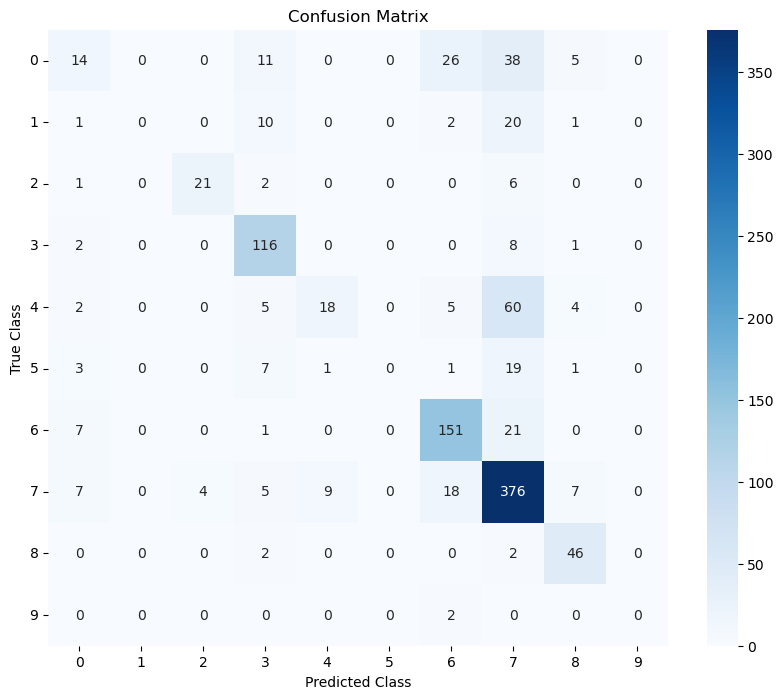

In [14]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_types_new):
    class_indices = np.where(val_types_new == class_label)[0]
    true_labels = val_types_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")
    
np.unique(val_types_new)

class_counts = pd.Series(val_types_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_types_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks()
plt.yticks(rotation=360)
plt.show()

# Timeframe

## Ungrouped

In [3]:
timeframe_encoder = {
    "0801-0850": 0, "0851-0900": 1, "0751-0800": 2, "0951-1000": 3, "1001-1050": 4,
    "1051-1100": 5, "1101-1150": 6, "1151-1200": 7, "1201-1250": 8, "1251-1300": 9,
    "1301-1350": 10, "1351-1400":11, "1401-1450": 12, "1451-1500": 13, "1501-1550": 14,
    "1551-1600": 15, "1601-1650": 16, "1651-1700": 17, "1701-1750": 18, "1751-1800": 19,
    "1801-1850": 20, "1851-1900": 21
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(22, activation='softmax')(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [4]:
history = head_model.fit(train_image, train_timeframes_new, batch_size=64, epochs=10, validation_data=(test_image, test_timeframes_new))

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.1502 - loss: 2.7066 - val_accuracy: 0.3022 - val_loss: 2.0662
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 428s 1s/step - accuracy: 0.2558 - loss: 2.1553 - val_accuracy: 0.2984 - val_loss: 1.9065
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.2861 - loss: 2.0053 - val_accuracy: 0.3293 - val_loss: 1.8672
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.3017 - loss: 1.9455 - val_accuracy: 0.3283 - val_loss: 1.8307
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3213 - loss: 1.8824 - val_accuracy: 0.3573 - val_loss: 1.8095
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - accuracy: 0.3295 - loss: 1.8554 - val_accuracy: 0.3545 - val_loss: 1.7910
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3424 - loss: 1.8233 - val_accuracy: 0.3424 - val_loss: 1.7815
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3407 - loss: 1.8082 - val_accu

In [13]:
head_model.save('timeframe_ungrouped_model.keras')
#head_model = load_model('timeframe_ungrouped_model.keras')

### Statistics

In [ ]:
head_model = load_model('timeframe_ungrouped_model.keras')
timeframe_encoder = {
    "0801-0850": 0, "0851-0900": 1, "0751-0800": 2, "0951-1000": 3, "1001-1050": 4,
    "1051-1100": 5, "1101-1150": 6, "1151-1200": 7, "1201-1250": 8, "1251-1300": 9,
    "1301-1350": 10, "1351-1400":11, "1401-1450": 12, "1451-1500": 13, "1501-1550": 14,
    "1551-1600": 15, "1601-1650": 16, "1651-1700": 17, "1701-1750": 18, "1751-1800": 19,
    "1801-1850": 20, "1851-1900": 21
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()


In [15]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_timeframes_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 4561s 138s/step - accuracy: 0.4007 - loss: 1.7363
Validation Loss: 1.7336708307266235
Validation Accuracy: 39.38%


34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 685ms/step
Class 5 Accuracy: 0.00%
Class 6 Accuracy: 0.00%
Class 7 Accuracy: 0.00%
Class 9 Accuracy: 0.00%
Class 10 Accuracy: 51.52%
Class 11 Accuracy: 0.00%
Class 12 Accuracy: 0.00%
Class 13 Accuracy: 53.92%
Class 14 Accuracy: 52.41%
Class 15 Accuracy: 2.17%
Class 16 Accuracy: 72.20%
Class 17 Accuracy: 22.02%
Class 18 Accuracy: 35.00%
Class 19 Accuracy: 9.68%
Class 20 Accuracy: 0.00%
Class 21 Accuracy: 68.42%
Class Distribution in Validation Set:
5       2
6       3
7       2
9      11
10     33
11     21
12     44
13    102
14    145
15     92
16    205
17    109
18     80
19     62
20     63
21     95
Name: count, dtype: int64


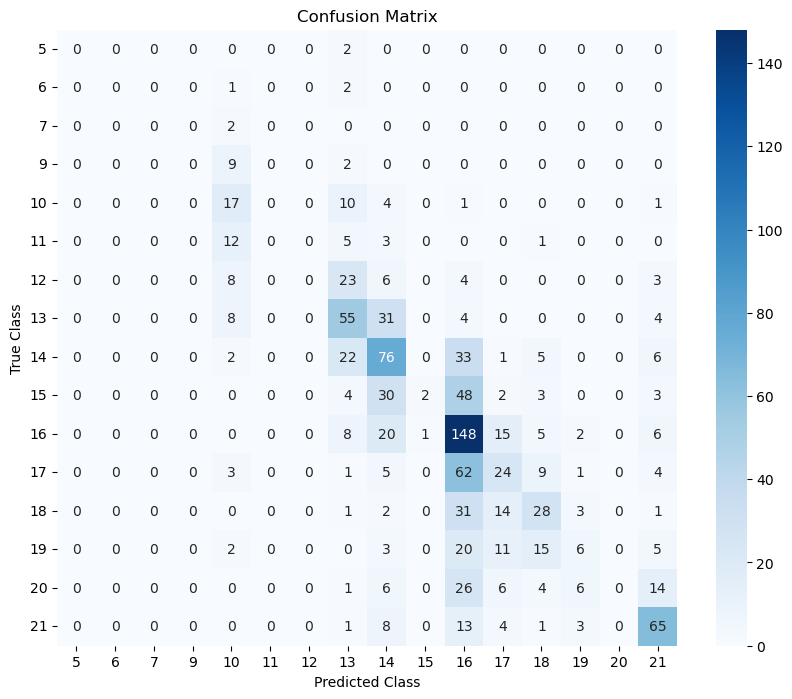

In [16]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_timeframes_new):
    class_indices = np.where(val_timeframes_new == class_label)[0]
    true_labels = val_timeframes_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")
    
np.unique(val_timeframes_new)

class_counts = pd.Series(val_timeframes_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_timeframes_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks()
plt.yticks(rotation=360)
plt.show()

## Grouped

In [23]:
timeframe_encoder = {
    "0801-0850": 0, "0851-0900": 0, "0751-0800": 0, "0951-1000": 0, "1001-1050": 0,
    "1051-1100": 0, "1101-1150": 0, "1151-1200": 0, "1201-1250": 0, "1251-1300": 0,
    "1301-1350": 0, "1351-1400": 0, "1401-1450": 1, "1451-1500": 1, "1501-1550": 2,
    "1551-1600": 2, "1601-1650": 3, "1651-1700": 3, "1701-1750": 4, "1751-1800": 4,
    "1801-1850": 5, "1851-1900": 5
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output) #has no weights unlike convolutional layers
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation='softmax')(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [25]:
history = head_model.fit(train_image, train_timeframes_new, batch_size=64, epochs=10, validation_data=(test_image, test_timeframes_new))

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 666s 2s/step - accuracy: 0.2850 - loss: 1.7220 - val_accuracy: 0.4238 - val_loss: 1.3764
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.4137 - loss: 1.4030 - val_accuracy: 0.4677 - val_loss: 1.2909
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.4565 - loss: 1.3209 - val_accuracy: 0.4808 - val_loss: 1.2281
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.4750 - loss: 1.2598 - val_accuracy: 0.5070 - val_loss: 1.2065
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.4942 - loss: 1.2236 - val_accuracy: 0.4949 - val_loss: 1.1946
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 552s 2s/step - accuracy: 0.4926 - loss: 1.2196 - val_accuracy: 0.5080 - val_loss: 1.1706
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.5015 - loss: 1.1761 - val_accuracy: 0.5051 - val_loss: 1.1622
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 511s 2s/step - accuracy: 0.5046 - loss: 1.1734 - val_accu

In [29]:
head_model.save('timeframe_grouped_model.keras')
#head_model = load_model('timeframe_grouped_model.keras')

### Statistics

In [31]:
head_model = load_model('timeframe_grouped_model.keras')
timeframe_encoder = {
    "0801-0850": 0, "0851-0900": 0, "0751-0800": 0, "0951-1000": 0, "1001-1050": 0,
    "1051-1100": 0, "1101-1150": 0, "1151-1200": 0, "1201-1250": 0, "1251-1300": 0,
    "1301-1350": 0, "1351-1400": 0, "1401-1450": 1, "1451-1500": 1, "1501-1550": 2,
    "1551-1600": 2, "1601-1650": 3, "1651-1700": 3, "1701-1750": 4, "1751-1800": 4,
    "1801-1850": 5, "1851-1900": 5
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()

In [32]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_timeframes_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 832ms/step - accuracy: 0.5627 - loss: 1.1172
Validation Loss: 1.1183010339736938
Validation Accuracy: 54.82%


34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step
Class 0 Accuracy: 22.22%
Class 1 Accuracy: 69.18%
Class 2 Accuracy: 52.32%
Class 3 Accuracy: 80.89%
Class 4 Accuracy: 16.90%
Class 5 Accuracy: 42.41%
Class Distribution in Validation Set:
0     72
1    146
2    237
3    314
4    142
5    158
Name: count, dtype: int64


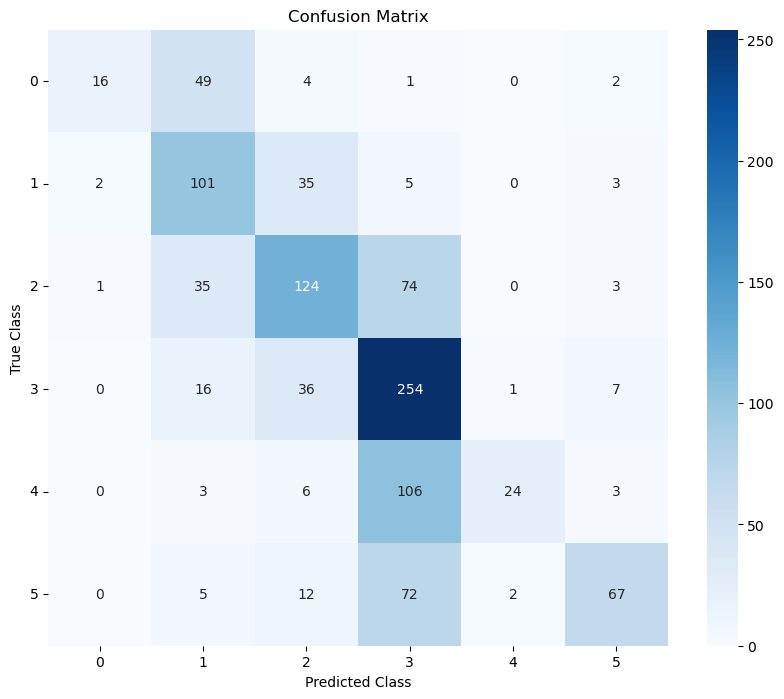

In [36]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_timeframes_new):
    class_indices = np.where(val_timeframes_new == class_label)[0]
    true_labels = val_timeframes_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")
    
np.unique(val_timeframes_new)

class_counts = pd.Series(val_timeframes_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_timeframes_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks()
plt.yticks(rotation=360)
plt.show()